In [23]:
# data manipulation library
import pandas as pd
import numpy as np
#data visualization library
import matplotlib.pyplot as plt
import seaborn as sns
# ignore warning masseges library
import warnings 
warnings.filterwarnings('ignore')
#import logging
import logging
logging.basicConfig(level=logging.INFO,
                   format ='%(asctime)s - %(levelname)s - %(message)s',
                   filemode = 'w',
                   filename = 'model.log',force = True)
#Import Scikit learn libraries for Model Building
from sklearn.preprocessing import MinMaxScaler, RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
#Importing Metrics for Regression Model
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [24]:
logging.info('IMPORT DATASET FOR MODEL BUILDING')

In [25]:
url = 'https://raw.githubusercontent.com/varunr1909/CementPrediction_Model/refs/heads/main/Concrete_Data.csv'

df = pd.read_csv(url)
df.sample(frac=1)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
453,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,56,31.72
189,233.8,0.0,94.6,197.9,4.6,947.0,852.2,3,10.38
1020,288.4,121.0,0.0,177.4,7.0,907.9,829.5,28,42.14
673,212.0,141.3,0.0,203.5,0.0,973.4,750.0,7,15.03
866,160.0,250.0,0.0,168.0,12.0,1049.0,688.0,28,39.45
...,...,...,...,...,...,...,...,...,...
717,141.3,212.0,0.0,203.5,0.0,971.8,748.5,3,4.83
455,213.5,0.0,174.2,159.2,11.7,1043.6,771.9,56,51.26
388,385.0,0.0,136.0,158.0,20.0,903.0,768.0,28,55.55
502,491.0,26.0,123.0,210.0,3.9,882.0,699.0,7,33.49


In [26]:
from collections import OrderedDict
stats=[]
for i in df.columns:
    numerical_stats =OrderedDict({
        'feature':i ,
        'min':df[i].min(),
        'max':df[i].max(),
        'mean':df[i].mean(),
        'median':df[i].quantile(0.50),
        'quantile(0.25)':df[i].quantile(0.25),
        'quantile(0.75)':df[i].quantile(0.75),
        'Standerd deviation':df[i].std(),                               
        'IQR':df[i].quantile(0.75)-df[i].quantile(0.25),
        'skewness':df[i].skew(),
        #skewness  : Spread of data
        'kurtosis':df[i].kurtosis()
        #kurtosis: show that spread of IQR
        })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
    #saving all OrderedDict Dictionary into Data Frame : Structured Frame

report
#if your data having positive skewed or negative skeweed in that scenario never ever impute with mean


,feature,min,max,mean,median,quantile(0.25),quantile(0.75),Standerd deviation,IQR,skewness,kurtosis
0,Cement (component 1)(kg in a m^3 mixture),102.00,540.0,281.167864,272.900,192.375,350.000,104.506364,157.625,0.509481,-0.520652
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,0.00,359.4,73.895825,22.000,0.000,142.950,86.279342,142.950,0.800717,-0.508175
2,Fly Ash (component 3)(kg in a m^3 mixture),0.00,200.1,54.188350,0.000,0.000,118.300,63.997004,118.300,0.537354,-1.328746
3,Water (component 4)(kg in a m^3 mixture),121.80,247.0,181.567282,185.000,164.900,192.000,21.354219,27.100,0.074628,0.122082
4,Superplasticizer (component 5)(kg in a m^3 mix...,0.00,32.2,6.204660,6.400,0.000,10.200,5.973841,10.200,0.907203,1.411269
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,801.00,1145.0,972.918932,968.000,932.000,1029.400,77.753954,97.400,-0.040220,-0.599016
6,Fine Aggregate (component 7)(kg in a m^3 mixture),594.00,992.6,773.580485,779.500,730.950,824.000,80.175980,93.050,-0.253010,-0.102177
7,Age (day),1.00,365.0,45.662136,28.000,7.000,56.000,63.169912,49.000,3.269177,12.168989
8,"Concrete compressive strength(MPa, megapascals)",2.33,82.6,35.817961,34.445,23.710,46.135,16.705742,22.425,0.416977,-0.313725


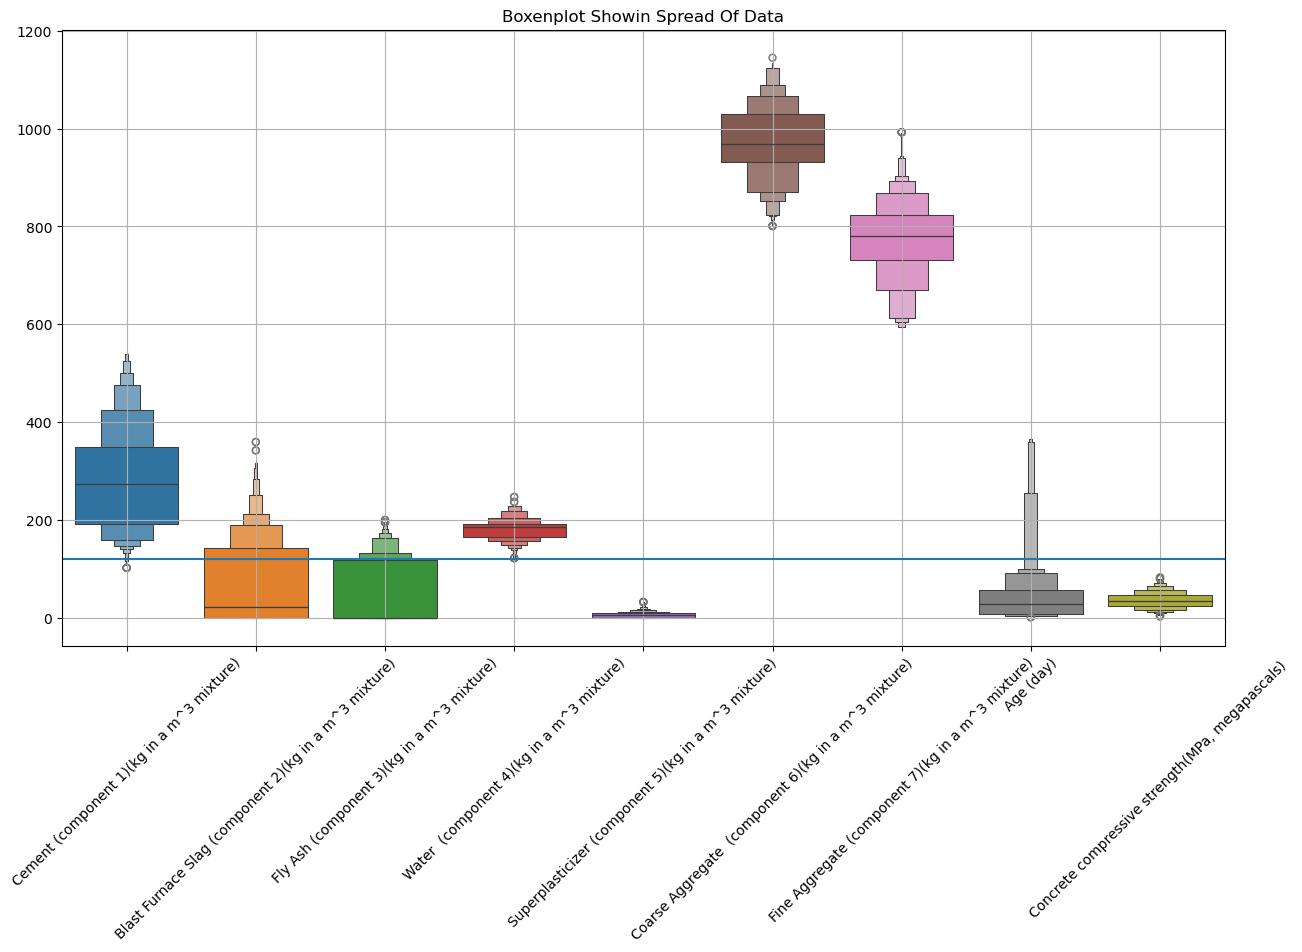

In [27]:
'''
Note:
1. Positive Kurtosis : Leptokurtic
2. Normal Kurtosis : Mesokurtic----------best
3. Negative Kurtosis : Platykurtic
* whenever kurtosis is 0.000 is mesokurtic
........................................................................................................
1. Positive Skewness : mode < median < mean
2. No Skewness : mean = median = mode
3. Negative Skewness = mean < median < mode
'''
plt.figure(figsize = (15,8))
sns.boxenplot(df)
plt.axhline(120)
plt.xticks(rotation = 45)
plt.title('Boxenplot Showin Spread Of Data')
plt.grid()
plt.show()

In [28]:
df.corr()
# correlation between columns
# negative sign denote inverse proportion

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash (component 3)(kg in a m^3 mixture),-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water (component 4)(kg in a m^3 mixture),-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer (component 5)(kg in a m^3 mixture),0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age (day),0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
"Concrete compressive strength(MPa, megapascals)",0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


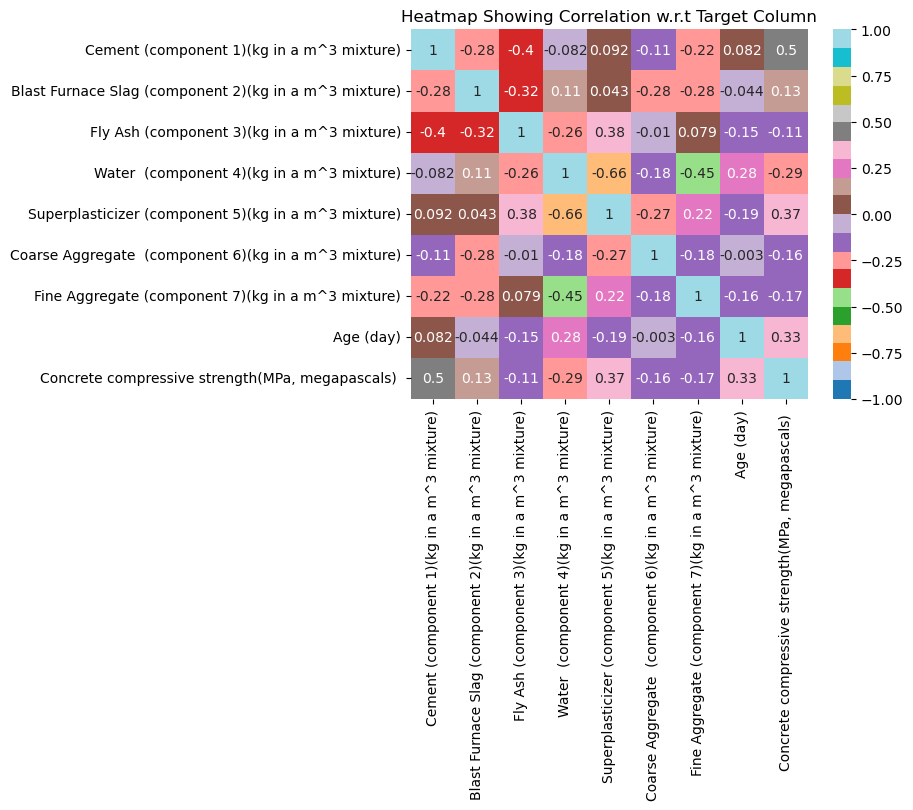

In [29]:
sns.heatmap(df.corr(),annot = True,center = 0 , vmax = 1 , vmin =-1, cmap = "tab20")
plt.title("Heatmap Showing Correlation w.r.t Target Column")
plt.show()
#annot show the number

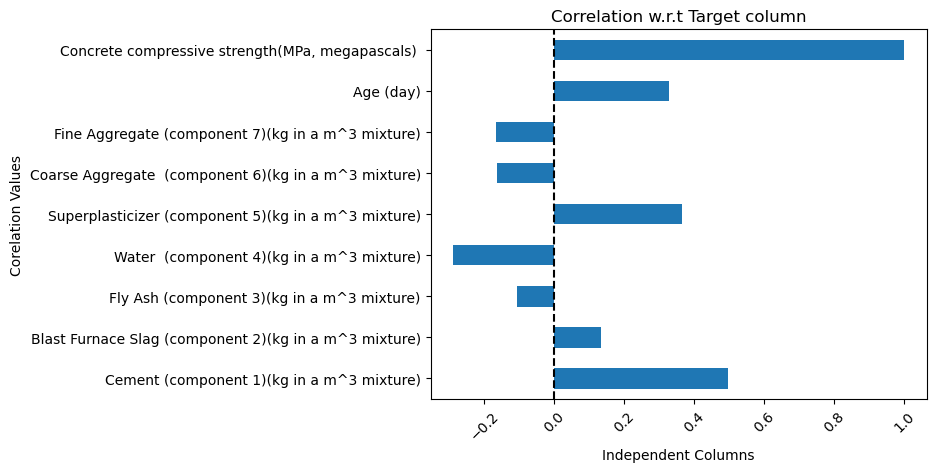

In [30]:
df.corr()['Concrete compressive strength(MPa, megapascals) '].plot(kind = 'barh')
plt.axvline(0,linestyle = '--',color= 'black')
plt.title('Correlation w.r.t Target column')
plt.ylabel('Corelation Values')
plt.xlabel('Independent Columns')
plt.xticks(rotation = 45)
plt.show()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [32]:
'''
1.As the dataset contains no categorical column , hence  no need of converting categorical into numerical
2.no missing value present in Given dataset
'''
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [33]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [34]:
'''
machine error value 1*10^-5'''

'\nmachine error value 1*10^-5'

In [35]:
#Preventing Data Leakege

#step1.: split data into X and y
#where X : Independeant columns and y: Dependent columns/Target Columns
X = df.drop('Concrete compressive strength(MPa, megapascals) ',axis=1)
y = df['Concrete compressive strength(MPa, megapascals) ']

#step2:Using train test split
#test_size between 0.20 to 0.35
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 42)

#step3: Using Scaling Technique

sc =MinMaxScaler()
#seen data
X_train = sc.fit_transform(X_train)
#Unseen data
X_test = sc.transform(X_test)

In [36]:
X_train

array([[0.21164384, 0.        , 0.51538462, ..., 0.59709302, 0.78248871,
        0.07417582],
       [0.50913242, 0.        , 0.        , ..., 0.76162791, 0.47415956,
        0.01648352],
       [0.49497717, 0.59126322, 0.        , ..., 0.14854651, 0.7185148 ,
        0.00549451],
       ...,
       [0.20159817, 0.        , 0.64205128, ..., 0.80813953, 0.51404917,
        0.27197802],
       [0.85159817, 0.33055092, 0.        , ..., 0.14854651, 0.47039639,
        0.07417582],
       [0.48401826, 0.        , 0.57948718, ..., 0.36046512, 0.47415956,
        0.07417582]])

In [37]:
X_train.max(),X_train.min()

(1.0000000000000002, 0.0)

In [38]:
#model building
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(X_train,y_train)
y_pred_LR = LR.predict(X_test)
print('Model Accuracy For Linear Regression',r2_score(y_test,y_pred_LR))

Model Accuracy For Linear Regression 0.5943782479239217


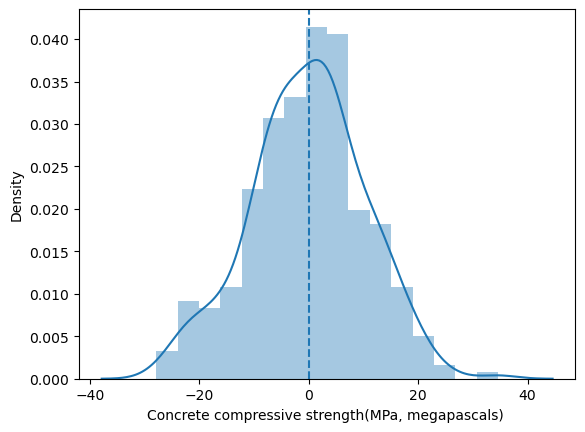

In [39]:
sns.distplot(y_test-y_pred_LR) #distplot: distrubution plot
plt.axvline(0,linestyle = '--')

Text(0, 0.5, 'y_pred_LR')

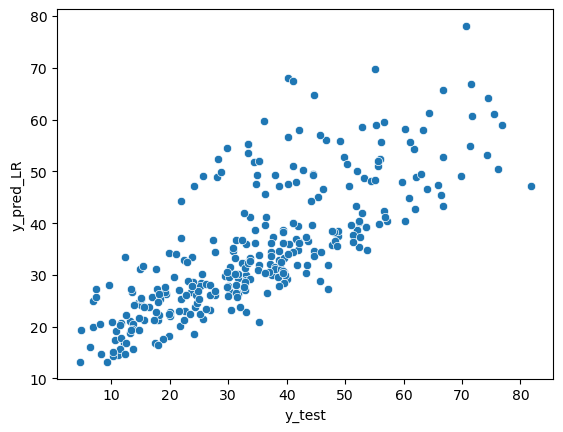

In [40]:
sns.scatterplot(x = y_test ,y = y_pred_LR)
plt.xlabel('y_test')
plt.ylabel('y_pred_LR')

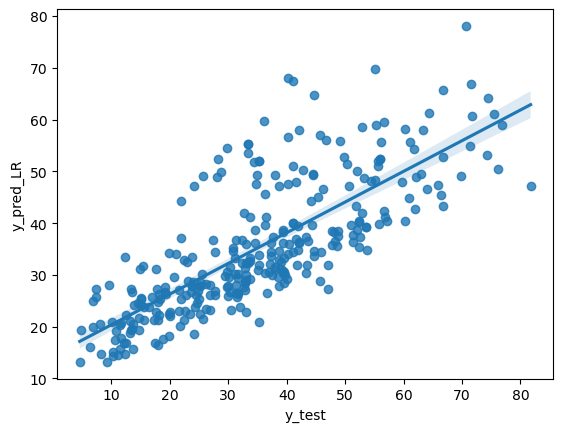

In [41]:
sns.regplot(x = y_test ,y = y_pred_LR)
plt.xlabel('y_test')
plt.ylabel('y_pred_LR')
plt.show()

In [42]:
LR.coef_

array([ 54.95342731,  41.97459796,  17.55268553, -11.34057972,
        12.76701497,   9.66978699,  14.4992847 ,  41.47485093])

In [43]:
LR.intercept_

-13.616932642237515

In [45]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor().fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)
print('the model accuracy for decision tree regressor',r2_score(y_test,y_pred_DT))

the model accuracy for decision tree regressor 0.81926246155437


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

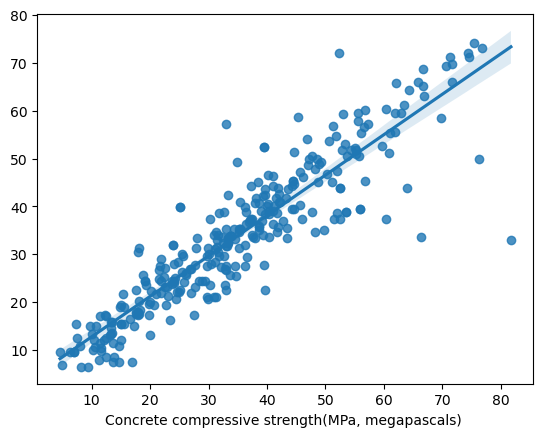

In [46]:
sns.regplot(x = y_test , y = y_pred_DT)

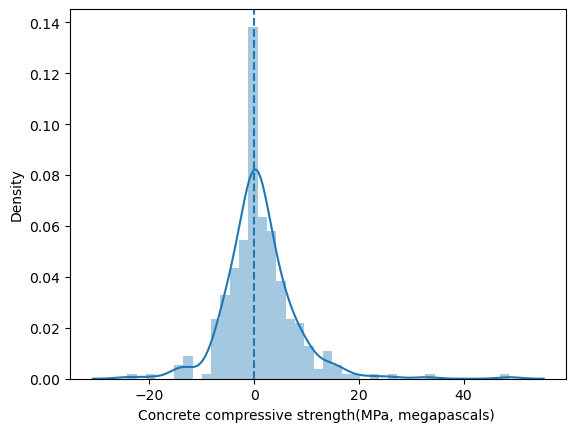

In [49]:
sns.distplot( y_test - y_pred_DT)
plt.axvline(0,linestyle='--')

In [50]:
#USING RANDOM FOREST REGRESSION
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor().fit(X_train,y_train)
y_pred_RF=RF.predict(X_test)
print('the accuracy of random forest regressor model',r2_score(y_test,y_pred_RF))

the accuracy of random forest regressor model 0.8870393423774374


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

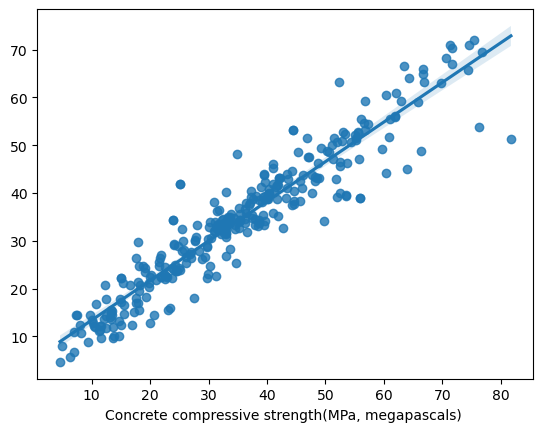

In [51]:
sns.regplot(x = y_test,y= y_pred_RF)

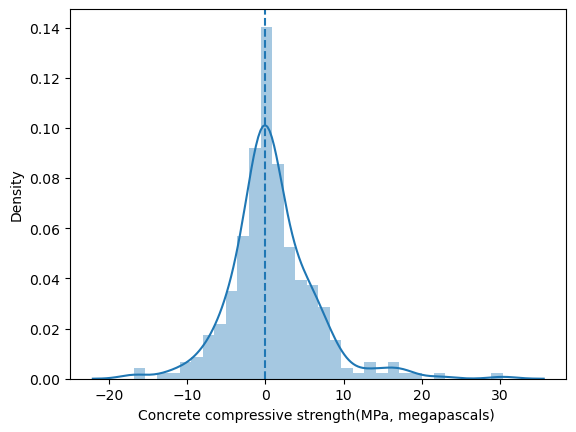

In [53]:
sns.distplot(y_test-y_pred_RF)
plt.axvline(0,linestyle='--')

In [54]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [55]:
RF.feature_importances_

array([0.32893187, 0.07573421, 0.02134113, 0.11302497, 0.06685422,
       0.02590671, 0.03580502, 0.33240187])